In [75]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%pip install plotly
import plotly.express as px
%pip install openpyxl
%pip install ydata-profiling
%pip install ipywidgets
from ydata_profiling import ProfileReport
ecomerce_df = pd.read_excel("E Commerce Dataset only.xlsx")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [76]:
ecomerce_df.shape

(5630, 20)

In [77]:
display(ecomerce_df)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [78]:
ecomerce_df.duplicated().sum()

np.int64(0)

In [79]:
ecomerce_df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [80]:
ecomerce_df.isnull().sum().sum()

np.int64(1856)

In [81]:
ecomerce_df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [82]:
ecomerce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [83]:
ecomerce_df.value_counts()

CustomerID  Churn  Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  PreferedOrderCat    SatisfactionScore  MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount
55630       0      8.0     Mobile Phone          1         15.0             Credit Card           Male    3.0             2                         Laptop & Accessory  3                  Married        4                0         13.0                         2.0         2.0         3.0                169.04            1
50001       1      4.0     Mobile Phone          3         6.0              Debit Card            Female  3.0             3                         Laptop & Accessory  2                  Single         9                1         11.0                         1.0         1.0         5.0                159.93            1
50004       1      0.0     Phone          

In [84]:
(ecomerce_df.isnull().sum() / len(ecomerce_df)) * 100

CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

In [85]:
median_Tenure = ecomerce_df['Tenure'].median()
print(median_Tenure)

9.0


In [86]:
ecomerce_df['Tenure'].fillna(median_Tenure, inplace=True)

/tmp/ipykernel_12321/1901201329.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [87]:
WarehouseToHome_median = ecomerce_df['WarehouseToHome'].median()
print(WarehouseToHome_median)

14.0


In [88]:
ecomerce_df['WarehouseToHome'].fillna(WarehouseToHome_median, inplace=True)

/tmp/ipykernel_12321/25355649.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [89]:
HourSpendOnApp_mean = ecomerce_df['HourSpendOnApp'].mean()
print(HourSpendOnApp_mean)

2.9315348837209303


In [90]:
ecomerce_df['HourSpendOnApp'].fillna(HourSpendOnApp_mean, inplace=True)

/tmp/ipykernel_12321/3285002945.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [91]:
OrderAmountHikeFromlastYear_mean = ecomerce_df['OrderAmountHikeFromlastYear'].mean()
print(OrderAmountHikeFromlastYear_mean)

15.707921714818266


In [92]:
ecomerce_df['OrderAmountHikeFromlastYear'].fillna(OrderAmountHikeFromlastYear_mean, inplace=True)

/tmp/ipykernel_12321/519964949.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [93]:
CouponUsed_median = ecomerce_df['CouponUsed'].median() 
print(CouponUsed_median)

1.0


In [94]:
ecomerce_df['CouponUsed'].fillna(CouponUsed_median, inplace=True)

/tmp/ipykernel_12321/2253733160.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [95]:
OrderCount_mean = ecomerce_df['OrderCount'].mean()
print(OrderCount_mean)

3.0080044676098288


In [96]:
ecomerce_df['OrderCount'].fillna(OrderCount_mean, inplace=True)

/tmp/ipykernel_12321/885960797.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [97]:
DaySinceLastOrder_median = ecomerce_df['DaySinceLastOrder'].median()
print(DaySinceLastOrder_median)

3.0


In [98]:
ecomerce_df['DaySinceLastOrder'].fillna(DaySinceLastOrder_median, inplace=True)

/tmp/ipykernel_12321/3566763958.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [99]:
ecomerce_df.MaritalStatus

0        Single
1        Single
2        Single
3        Single
4        Single
         ...   
5625    Married
5626    Married
5627    Married
5628    Married
5629    Married
Name: MaritalStatus, Length: 5630, dtype: object

In [100]:
ecomerce_df['Gender_boolean'] = np.where(ecomerce_df['Gender'] == 'Male', 1, 0)

In [101]:
ecomerce_df["MS_Married"] = (ecomerce_df["MaritalStatus"] == "Married").astype(int)
ecomerce_df["MS_Single"] = (ecomerce_df["MaritalStatus"] == "Single").astype(int)
ecomerce_df["MS_Divorced"] = (ecomerce_df["MaritalStatus"] == "Divorced").astype(int)

In [102]:
ecomerce_df["PreferredLoginDevice"].value_counts()

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64

In [103]:
ecomerce_df['PreferredLoginDevice_boolean'] = np.where(ecomerce_df['PreferredLoginDevice'].isin(['Phone','Mobile Phone']), 1, 0)

In [104]:
ecomerce_df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Gender_boolean,MS_Married,MS_Single,MS_Divorced,PreferredLoginDevice_boolean
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.000000,3,...,11.0,1.0,1.0,5.0,159.93,0,0,1,0,1
1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.000000,4,...,15.0,0.0,1.0,0.0,120.90,1,0,1,0,1
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.000000,4,...,14.0,0.0,1.0,3.0,120.28,1,0,1,0,1
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.000000,4,...,23.0,0.0,1.0,3.0,134.07,1,0,1,0,1
4,50005,1,0.0,Phone,1,12.0,CC,Male,2.931535,3,...,11.0,1.0,1.0,3.0,129.60,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.000000,2,...,18.0,1.0,2.0,4.0,150.71,1,1,0,0,0
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.000000,5,...,16.0,1.0,2.0,3.0,224.91,1,1,0,0,1
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.000000,2,...,21.0,1.0,2.0,4.0,186.42,1,1,0,0,1
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.000000,5,...,15.0,2.0,2.0,9.0,178.90,1,1,0,0,0


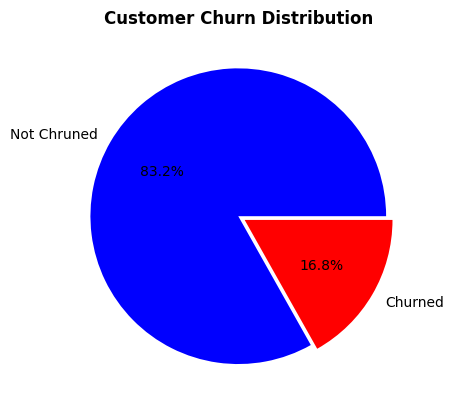

In [105]:

count_churn=ecomerce_df["Churn"].value_counts()
plt.pie(count_churn,labels=["Not Chruned","Churned"],autopct="%1.1f%%",explode=[0,.05],colors=["blue","red"])
plt.title("Customer Churn Distribution",fontdict={"fontweight":"bold"})
plt.show()


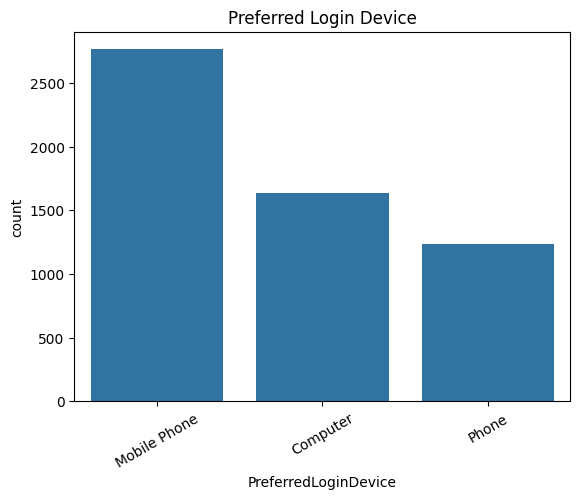

In [106]:
sns.countplot(x="PreferredLoginDevice", data=ecomerce_df, order=ecomerce_df["PreferredLoginDevice"].value_counts().index)
plt.title("Preferred Login Device")
plt.xticks(rotation=30)
plt.show()


/tmp/ipykernel_12321/4109219729.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_12321/4109219729.py:4: UserWarning:

The palette list has more values (15) than needed (7), which may not be intended.



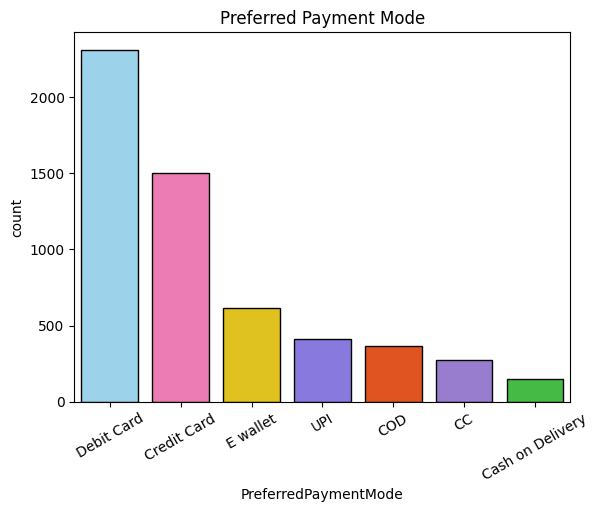

In [107]:
colors = ["#90D7F8", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#AE4532", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]
sns.countplot(x="PreferredPaymentMode", data=ecomerce_df, order=ecomerce_df["PreferredPaymentMode"].value_counts().index,palette=colors,edgecolor="black")
plt.title("Preferred Payment Mode")
plt.xticks(rotation=30)
plt.show()



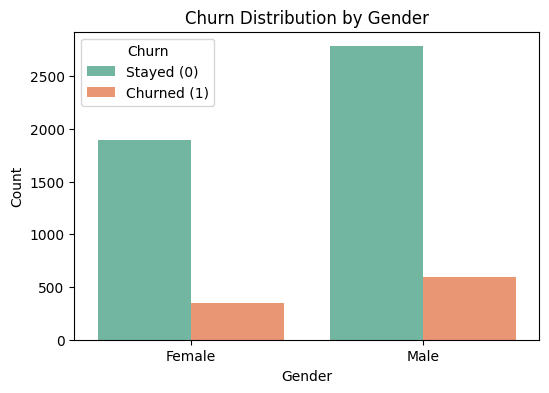

In [108]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x="Gender", hue="Churn", data=ecomerce_df, palette="Set2")


plt.title("Churn Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["Stayed (0)", "Churned (1)"])

In [109]:
fig = px.pie(
    ecomerce_df[ecomerce_df["Churn"]==1],
    names="PreferredPaymentMode",
    title="Preferred Payment Mode (Churned Customers)"
)
fig.show()

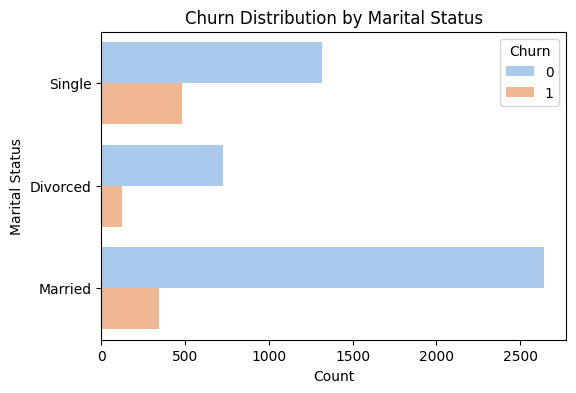

In [110]:
plt.figure(figsize=(6,4))
sns.countplot(y="MaritalStatus", hue="Churn", data=ecomerce_df, palette="pastel")
plt.title("Churn Distribution by Marital Status")
plt.xlabel("Count")
plt.ylabel("Marital Status")
plt.show()


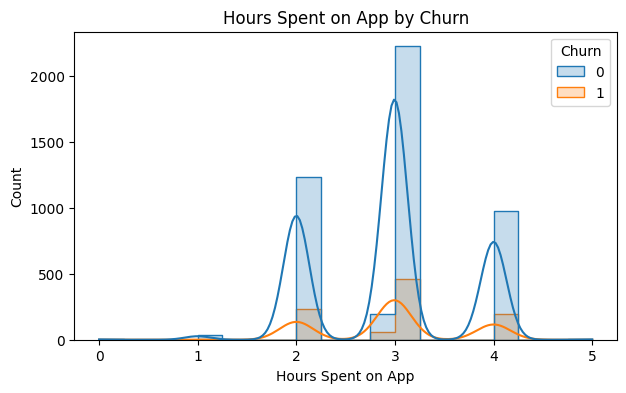

In [111]:
plt.figure(figsize=(7,4))
sns.histplot(data=ecomerce_df, x="HourSpendOnApp", hue="Churn", kde=True, element="step", bins=20)
plt.title("Hours Spent on App by Churn")
plt.xlabel("Hours Spent on App")
plt.ylabel("Count")
plt.show()

In [ ]:
profile = ProfileReport(ecomerce_df, title="E-Commerce Churn EDA Report", explorative=True)

profile.to_notebook_iframe()

Summarize dataset:  20%|██        | 6/30 [00:00<00:00, 54.01it/s, Describe variable: Gender]              

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]


In [ ]:
#t-test
x_churn=ecomerce_df[ecomerce_df["Churn"] == 1]["Tenure"]
x_tenure=ecomerce_df[ecomerce_df["Churn"] == 0]["Tenure"]
t_statistcs,p_value=stats.ttest_ind(x_churn,x_tenure)
print(t_statistcs,p_value) #p_value < 0.05

-26.927204328509323 2.494913539747146e-150


In [ ]:
ecomerce_df["PreferredLoginDevice"]=ecomerce_df["PreferredLoginDevice"].str.replace("Mobile Phone","Phone")

In [ ]:
x_login=ecomerce_df.PreferredLoginDevice
congtingency=pd.crosstab(ecomerce_df["Churn"],ecomerce_df["PreferredLoginDevice"])
chi_2,p_value,dof,expected=stats.chi2_contingency(congtingency)
print(chi_2,p_value)#p_value < 0.05

14.40125265089403 0.0001477040239947965


In [ ]:
tier1 = ecomerce_df[ecomerce_df["CityTier"] == 1]["Tenure"]
tier2 = ecomerce_df[ecomerce_df["CityTier"] == 2]["Tenure"]
tier3 = ecomerce_df[ecomerce_df["CityTier"] == 3]["Tenure"]
f_stats,p_value=stats.f_oneway(tier1,tier2,tier3)
print(f_stats,p_value)  #p_value < .05

11.307283528901452 1.2564658258444098e-05


In [ ]:
#t-test
x_churn=ecomerce_df[ecomerce_df["Churn"] == 1]["WarehouseToHome"]
x_ware=ecomerce_df[ecomerce_df["Churn"] == 0]["WarehouseToHome"]
t_statistcs,p_value=stats.ttest_ind(x_churn,x_ware)
print(t_statistcs,p_value) #p_value < 0.05 

5.229831299478068 1.7579836224030932e-07


In [ ]:
congtingency=pd.crosstab(ecomerce_df["Churn"],ecomerce_df["PreferredPaymentMode"])
chi_2,p_value,dof,expected=stats.chi2_contingency(congtingency)
print(chi_2,p_value)#p_value < 0.05

77.89682023026812 9.708708511076305e-15


In [ ]:
congtingency=pd.crosstab(ecomerce_df["Churn"],ecomerce_df["Gender"])
chi_2,p_value,dof,expected=stats.chi2_contingency(congtingency)
print(chi_2,p_value)#p_value < 0.05 

4.662908495367532 0.030820940334890086


In [ ]:
#t-test
x_churn=ecomerce_df[ecomerce_df["Churn"] == 1]["HourSpendOnApp"]
x_app=ecomerce_df[ecomerce_df["Churn"] == 0]["HourSpendOnApp"]
t_statistcs,p_value=stats.ttest_ind(x_churn,x_app)
print(t_statistcs,p_value) #p_value > 0.05

1.3600078128387554 0.1738819262508301


In [ ]:
x_churn=ecomerce_df[ecomerce_df["Churn"] == 1]["NumberOfDeviceRegistered"]
x_dev=ecomerce_df[ecomerce_df["Churn"] == 0]["NumberOfDeviceRegistered"]
t_statistcs,p_value=stats.ttest_ind(x_churn,x_dev)
print(t_statistcs,p_value) #p_value < 0.05

8.145136855113543 4.626451530290174e-16


In [ ]:
x_churn=ecomerce_df[ecomerce_df["Churn"] == 1]["OrderAmountHikeFromlastYear"]
x_dev=ecomerce_df[ecomerce_df["Churn"] == 0]["OrderAmountHikeFromlastYear"]
t_statistcs,p_value=stats.ttest_ind(x_churn,x_dev)
print(t_statistcs,p_value) #p_value > 0.05  

-0.7464232384504431 0.45544296328867817


In [ ]:
x_churn=ecomerce_df[ecomerce_df["Churn"] == 1]["CouponUsed"]
x_cop=ecomerce_df[ecomerce_df["Churn"] == 0]["CouponUsed"]
t_statistcs,p_value=stats.ttest_ind(x_churn,x_cop)
print(t_statistcs,p_value) #p_value > 0.05  

-0.10728700657961801 0.9145651164356325


In [ ]:
ecomerce_df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Gender_boolean,MS_Married,MS_Single,MS_Divorced,PreferredLoginDevice_boolean
0,50001,1,4.0,Phone,3,6.0,Debit Card,Female,3.000000,3,...,11.0,1.0,1.0,5.0,159.93,0,0,1,0,1
1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.000000,4,...,15.0,0.0,1.0,0.0,120.90,1,0,1,0,1
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.000000,4,...,14.0,0.0,1.0,3.0,120.28,1,0,1,0,1
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.000000,4,...,23.0,0.0,1.0,3.0,134.07,1,0,1,0,1
4,50005,1,0.0,Phone,1,12.0,CC,Male,2.931535,3,...,11.0,1.0,1.0,3.0,129.60,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.000000,2,...,18.0,1.0,2.0,4.0,150.71,1,1,0,0,0
5626,55627,0,13.0,Phone,1,13.0,Credit Card,Male,3.000000,5,...,16.0,1.0,2.0,3.0,224.91,1,1,0,0,1
5627,55628,0,1.0,Phone,1,11.0,Debit Card,Male,3.000000,2,...,21.0,1.0,2.0,4.0,186.42,1,1,0,0,1
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.000000,5,...,15.0,2.0,2.0,9.0,178.90,1,1,0,0,0


In [ ]:
x_churn=ecomerce_df[ecomerce_df["Churn"] == 1]["OrderCount"]
x_ord=ecomerce_df[ecomerce_df["Churn"] == 0]["OrderCount"]
t_statistcs,p_value=stats.ttest_ind(x_churn,x_ord)
print(t_statistcs,p_value) #p_value < 0.05  

-2.127066076590507 0.03345796377596109


In [ ]:
x_churn=ecomerce_df[ecomerce_df["Churn"] == 1]["DaySinceLastOrder"]
x_ord=ecomerce_df[ecomerce_df["Churn"] == 0]["DaySinceLastOrder"]
t_statistcs,p_value=stats.ttest_ind(x_churn,x_ord)
print(t_statistcs,p_value) #p_value < 0.05   

-11.838127578080636 5.920403597328295e-32


In [ ]:
x_churn=ecomerce_df[ecomerce_df["Churn"] == 1]["CashbackAmount"]
x_ord=ecomerce_df[ecomerce_df["Churn"] == 0]["CashbackAmount"]
t_statistcs,p_value=stats.ttest_ind(x_churn,x_ord)
print(t_statistcs,p_value) #p_value < 0.05   

-11.701754038593704 2.867709304816521e-31


In [ ]:
ecomerce_df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'Gender_boolean', 'MS_Married',
       'MS_Single', 'MS_Divorced', 'PreferredLoginDevice_boolean'],
      dtype='object')

In [ ]:
ecomerce_df[['PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain']]

,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain
0,Laptop & Accessory,2,Single,9,1
1,Mobile,3,Single,7,1
2,Mobile,3,Single,6,1
3,Laptop & Accessory,5,Single,8,0
4,Mobile,5,Single,3,0
...,...,...,...,...,...
5625,Laptop & Accessory,1,Married,6,0
5626,Fashion,5,Married,6,0
5627,Laptop & Accessory,4,Married,3,1
5628,Laptop & Accessory,4,Married,4,0


In [ ]:
congtingency=pd.crosstab(ecomerce_df["Churn"],ecomerce_df["PreferedOrderCat"])
chi_2,p_value,dof,expected=stats.chi2_contingency(congtingency)
print(chi_2,p_value)#p_value < 0.05

288.63939355672443 2.7708325346337454e-60


In [ ]:
x_churn=ecomerce_df[ecomerce_df["Churn"] == 1]["SatisfactionScore"]
x_ord=ecomerce_df[ecomerce_df["Churn"] == 0]["SatisfactionScore"]
t_statistcs,p_value=stats.ttest_ind(x_churn,x_ord)
print(t_statistcs,p_value) #p_value < 0.05   

7.957588346935353 2.105157407388599e-15


In [ ]:
congtingency=pd.crosstab(ecomerce_df["Churn"],ecomerce_df["MaritalStatus"])
chi_2,p_value,dof,expected=stats.chi2_contingency(congtingency)
print(chi_2,p_value)#p_value < 0.05

188.6710396770566 1.073011277910542e-41


In [ ]:
x_churn=ecomerce_df[ecomerce_df["Churn"] == 1]["NumberOfAddress"]
x_ord=ecomerce_df[ecomerce_df["Churn"] == 0]["NumberOfAddress"]
t_statistcs,p_value=stats.ttest_ind(x_churn,x_ord)
print(t_statistcs,p_value) #p_value < 0.05   

3.298889512991889 0.0009767132246168275


In [ ]:
congtingency=pd.crosstab(ecomerce_df["Churn"],ecomerce_df["Complain"])
chi_2,p_value,dof,expected=stats.chi2_contingency(congtingency)
print(chi_2,p_value)#p_value < 0.05

350.92545525927073 2.6644609654641377e-78
